In [68]:
# import standard libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# supress versioning warnings of keras
import warnings

from sympy import false

warnings.filterwarnings('ignore')

%matplotlib inline



In [69]:
import os
os.environ["KERAS_BACKEND"] = "torch"

In [70]:
import keras
from keras import Sequential # sequential model: https://keras.io/guides/sequential_model/
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2

In [71]:
charging_data = pd.read_pickle(os.path.join('Data', 'charging_data.pkl'))
weather_data = pd.read_pickle(os.path.join('Data', 'weather_data.pkl'))

In [72]:
charging_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60834 entries, 0 to 65036
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype                              
---  ------               --------------  -----                              
 0   counter              60834 non-null  int64                              
 1   id                   60834 non-null  object                             
 2   connectionTime       60834 non-null  datetime64[ns, America/Los_Angeles]
 3   disconnectTime       60834 non-null  datetime64[ns, America/Los_Angeles]
 4   doneChargingTime     60834 non-null  datetime64[ns, America/Los_Angeles]
 5   kWhDelivered         60834 non-null  float64                            
 6   sessionID            60834 non-null  object                             
 7   siteID               60834 non-null  object                             
 8   spaceID              60834 non-null  object                             
 9   stationID            60834 non-nu

In [73]:
charging_data.head(20)

,counter,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,connection_date,year_month,charging_duration,connection_duration
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54-08:00,2020-01-02 11:11:15-08:00,2020-01-02 09:31:35-08:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",2020-01-02,2020-01,262.683333,362.350000
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50-08:00,2020-01-02 14:38:21-08:00,2020-01-02 12:18:05-08:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",2020-01-02,2020-01,401.250000,541.516667
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35-08:00,2020-01-02 16:39:22-08:00,2020-01-02 08:35:06-08:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",2020-01-02,2020-01,158.516667,642.783333
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58-08:00,2020-01-02 08:38:39-08:00,2020-01-02 07:18:45-08:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",2020-01-02,2020-01,78.783333,158.683333
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01-08:00,2020-01-02 14:08:40-08:00,2020-01-02 10:17:30-08:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",2020-01-02,2020-01,257.483333,488.650000
5,5,5e23b149f9af8b5fe4b973d4,2020-01-02 06:00:13-08:00,2020-01-02 15:00:41-08:00,2020-01-02 12:13:21-08:00,13.370,1_1_194_821_2020-01-02 14:00:05.241573,1,AG-1F13,1-1-194-821,America/Los_Angeles,3519,"[{'WhPerMile': 600, 'kWhRequested': 24.0, 'mil...",2020-01-02,2020-01,373.133333,540.466667
6,6,5e23b149f9af8b5fe4b973d5,2020-01-02 06:09:14-08:00,2020-01-02 17:57:58-08:00,2020-01-02 16:59:21-08:00,43.477,1_1_178_817_2020-01-02 14:09:14.451827,1,AG-1F09,1-1-178-817,America/Los_Angeles,933,"[{'WhPerMile': 385, 'kWhRequested': 65.45, 'mi...",2020-01-02,2020-01,650.116667,708.733333
7,7,5e23b149f9af8b5fe4b973d6,2020-01-02 06:17:32-08:00,2020-01-02 16:44:54-08:00,2020-01-02 12:22:40-08:00,32.441,1_1_191_804_2020-01-02 14:17:32.329535,1,AG-4F34,1-1-191-804,America/Los_Angeles,3737,"[{'WhPerMile': 300, 'kWhRequested': 45.0, 'mil...",2020-01-02,2020-01,365.133333,627.366667
8,8,5e23b149f9af8b5fe4b973d7,2020-01-02 06:25:38-08:00,2020-01-02 11:36:05-08:00,2020-01-02 10:38:39-08:00,13.264,1_1_194_826_2020-01-02 14:25:37.578692,1,AG-1F11,1-1-194-826,America/Los_Angeles,419,"[{'WhPerMile': 400, 'kWhRequested': 40.0, 'mil...",2020-01-02,2020-01,253.016667,310.450000
9,9,5e23b149f9af8b5fe4b973d8,2020-01-02 06:27:40-08:00,2020-01-02 12:01:48-08:00,2020-01-02 11:17:46-08:00,13.285,1_1_178_823_2020-01-02 14:27:39.582337,1,AG-1F08,1-1-178-823,America/Los_Angeles,651,"[{'WhPerMile': 400, 'kWhRequested': 20.0, 'mil...",2020-01-02,2020-01,290.100000,334.133333


### Task 4

In [74]:
agg_charging_data = pd.read_pickle(os.path.join('Data', 'aggregated_data.pkl'))
agg_charging_data['year'] = agg_charging_data.index.year

In [75]:
agg_charging_data.tail(20)

,activeSessions_site1,utilizationRate_site1,kWhDelivered_site1,idleRate_site1,blockedRate_site1,activeSessions_site2,utilizationRate_site2,kWhDelivered_site2,idleRate_site2,blockedRate_site2,...,pressure,windspeed,precipitation,hour_of_day,week_of_year,day_of_week,month_of_year,is_weekend,date,year
start_hour,,,,,,,,,,,,,,,,,,,,,
2021-09-13 13:00:00-07:00,38,0.681522,62.405529,0.481655,0.353264,13,0.226434,50.010964,0.523331,0.107934,...,NaN,NaN,NaN,13,37,0,9,False,2021-09-13,2021
2021-09-13 14:00:00-07:00,36,0.623745,56.180748,0.484923,0.321277,14,0.244273,64.611631,0.530476,0.114692,...,NaN,NaN,NaN,14,37,0,9,False,2021-09-13,2021
2021-09-13 15:00:00-07:00,29,0.483397,45.525178,0.541197,0.221784,14,0.236500,40.547119,0.426591,0.135611,...,NaN,NaN,NaN,15,37,0,9,False,2021-09-13,2021
2021-09-13 16:00:00-07:00,22,0.313745,28.491914,0.463964,0.168178,14,0.208576,26.987689,0.434622,0.117924,...,NaN,NaN,NaN,16,37,0,9,False,2021-09-13,2021
2021-09-13 17:00:00-07:00,13,0.144423,11.526976,0.377571,0.089893,11,0.156480,5.856552,0.153568,0.132449,...,NaN,NaN,NaN,17,37,0,9,False,2021-09-13,2021
2021-09-13 18:00:00-07:00,4,0.061474,4.147149,0.298749,0.043109,8,0.084495,4.586113,0.026479,0.082258,...,NaN,NaN,NaN,18,37,0,9,False,2021-09-13,2021
2021-09-13 19:00:00-07:00,2,0.030118,0.000000,0.000000,0.030118,2,0.024975,37.268642,0.728008,0.006793,...,NaN,NaN,NaN,19,37,0,9,False,2021-09-13,2021
2021-09-13 20:00:00-07:00,1,0.005743,0.000000,0.000000,0.005743,1,0.001566,3.209244,1.000000,0.000000,...,NaN,NaN,NaN,20,37,0,9,False,2021-09-13,2021
2021-09-13 21:00:00-07:00,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,21,37,0,9,False,2021-09-13,2021


In [76]:
#day_of_week = 0 = Montag
# Convert the 'week_of_year' column from UInt32 to Int32
agg_charging_data['week_of_year'] = agg_charging_data['week_of_year'].astype('int32')
agg_charging_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29717 entries, 2018-04-25 04:00:00-07:00 to 2021-09-14 08:00:00-07:00
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   activeSessions_site1     29717 non-null  int64  
 1   utilizationRate_site1    29717 non-null  float64
 2   kWhDelivered_site1       29717 non-null  float64
 3   idleRate_site1           29717 non-null  float64
 4   blockedRate_site1        29717 non-null  float64
 5   activeSessions_site2     29717 non-null  int64  
 6   utilizationRate_site2    29717 non-null  float64
 7   kWhDelivered_site2       29717 non-null  float64
 8   idleRate_site2           29717 non-null  float64
 9   blockedRate_site2        29717 non-null  float64
 10  activeSessions_total     29717 non-null  int64  
 11  kWhDelivered_total       29717 non-null  float64
 12  utilizationRate_total    29717 non-null  float64
 13  idleRate_total           2971

In [77]:
#different data sets to train the models
gesamt_charging_data = agg_charging_data[['utilizationRate_total', 'hour_of_day', 'day_of_week', 'month_of_year', 'activeSessions_total']]

site1_charging_data = agg_charging_data[
    ['utilizationRate_site1', 'hour_of_day', 'day_of_week', 'month_of_year',
     'activeSessions_site1']]

site2_charging_data = agg_charging_data[
    ['utilizationRate_site2', 'hour_of_day', 'day_of_week', 'month_of_year', 
     'activeSessions_site2']]

#data we want to predict that are tracked after the data hole 
last_sesonal_data = agg_charging_data.loc['2020-11-19':'2021-09-15']

gesamt_last_season = last_sesonal_data[['utilizationRate_total', 'hour_of_day', 'day_of_week', 'month_of_year', 'activeSessions_total']]

site1_last_season = last_sesonal_data[
    ['utilizationRate_site1', 'hour_of_day', 'day_of_week', 'month_of_year', 
     'activeSessions_site1']]

site2_last_season = last_sesonal_data[
    ['utilizationRate_site2', 'hour_of_day', 'day_of_week', 'month_of_year', 
     'activeSessions_site2']]


In [78]:
gesamt_last_season.tail(50)

,utilizationRate_total,hour_of_day,day_of_week,month_of_year,activeSessions_total
start_hour,,,,,
2021-09-12 07:00:00-07:00,0.031856,7,6,9,5
2021-09-12 08:00:00-07:00,0.045885,8,6,9,5
2021-09-12 09:00:00-07:00,0.050683,9,6,9,6
2021-09-12 10:00:00-07:00,0.048294,10,6,9,6
2021-09-12 11:00:00-07:00,0.051051,11,6,9,6
2021-09-12 12:00:00-07:00,0.029086,12,6,9,5
2021-09-12 13:00:00-07:00,0.014143,13,6,9,2
2021-09-12 14:00:00-07:00,0.013904,14,6,9,2
2021-09-12 15:00:00-07:00,0.005478,15,6,9,1


In [104]:
model_dataset = site2_last_season
y_output = 'utilizationRate_site2'
    

In [105]:
#important to sort the values because we want to split the data time dependently. Therefore we use the shuffle=False information later, when we split the dataset and fit the model

In [106]:
model_dataset = model_dataset.sort_values(by='start_hour')

In [107]:
X = model_dataset.iloc[:,1:5]
y = model_dataset[y_output]
print(X.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7184 entries, 2020-11-19 00:00:00-08:00 to 2021-09-14 08:00:00-07:00
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   hour_of_day           7184 non-null   int32
 1   day_of_week           7184 non-null   int32
 2   month_of_year         7184 non-null   int32
 3   activeSessions_site2  7184 non-null   int64
dtypes: int32(3), int64(1)
memory usage: 454.5 KB
None


In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

X_test.head(50)

,hour_of_day,day_of_week,month_of_year,activeSessions_site2
start_hour,,,,
2021-06-16 13:00:00-07:00,13,2,6,7
2021-06-16 14:00:00-07:00,14,2,6,6
2021-06-16 15:00:00-07:00,15,2,6,6
2021-06-16 16:00:00-07:00,16,2,6,7
2021-06-16 17:00:00-07:00,17,2,6,5
2021-06-16 18:00:00-07:00,18,2,6,4
2021-06-16 19:00:00-07:00,19,2,6,3
2021-06-16 20:00:00-07:00,20,2,6,5
2021-06-16 21:00:00-07:00,21,2,6,4


In [109]:


# Standardize features
scaler = StandardScaler()
scaler.fit(X_train)  # Fit the scaler on the training data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Normalize Target (y)
scaler_y = StandardScaler()  # Separate scaler for target variable

# Reshape target to fit the scaler (it expects 2D input)
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)


scaler_y.fit(y_train)           # Fit on training data
y_train_scaled = scaler_y.transform(y_train)  # Transform training data
y_test_scaled = scaler_y.transform(y_test)    # Transform test data
print(y_train)

[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.05454545]
 [0.05454545]
 [0.06066162]]


In [110]:
print(X_train_scaled.shape)
#print(X_train.head())


(5028, 4)


In [111]:
# model = Sequential([
#     Dense(32, activation="relu", input_shape=(5,)),  # Input layer with 36 units
#     Dense(16, activation="relu"), 
#     Dense(1)  # Output layer with 1 unit (for regression)
# ])

model = Sequential([
    Dense(32, activation="relu", input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.001)),  # Input layer
    BatchNormalization(),  # Normalize layer outputs
    Dropout(0.3),  # Dropout for regularization
    
    Dense(32, activation="relu", kernel_regularizer=l2(0.001)),  # Hidden layer 1
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation="relu", kernel_regularizer=l2(0.001)),  # Hidden layer 1
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(1, activation="linear")  # Output layer for regression
])

We need to pass the following parameters:

- input_shape - number of columns of the dataset (only for input layer)

- units - number of neurons and dimensionality of outputs to be fed to the next layer, if any

- activation - activation function which is ReLU in this case

In [112]:
# Compiling the ANN
model.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [113]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 192 (768.00 B)

In [114]:
history = model.fit(X_train_scaled, y_train_scaled, epochs=15, validation_split=0.2, shuffle =False)

Epoch 1/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.4678 - mae: 1.1621 - mse: 2.3994 - val_loss: 1.2869 - val_mae: 0.7753 - val_mse: 1.2185
Epoch 2/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.9561 - mae: 0.7354 - mse: 0.8878 - val_loss: 0.7692 - val_mae: 0.5924 - val_mse: 0.7011
Epoch 3/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.7328 - mae: 0.6330 - mse: 0.6648 - val_loss: 0.4540 - val_mae: 0.4351 - val_mse: 0.3863
Epoch 4/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.5633 - mae: 0.5524 - mse: 0.4958 - val_loss: 0.3332 - val_mae: 0.3690 - val_mse: 0.2660
Epoch 5/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.4903 - mae: 0.5123 - mse: 0.4233 - val_loss: 0.2838 - val_mae: 0.3432 - val_mse: 0.2172
Epoch 6/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.4314 - mae: 0.4721 - mse: 0.3649 - val_loss: 0.2762 - val_mae: 0.3345 - val_mse: 0.2102
Epoch 7/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.4120 - mae: 0.4589 - mse: 0.346

In [115]:
history_df = pd.DataFrame(history.history)
history_df

,loss,mae,mse,val_loss,val_mae,val_mse
0,1.785848,0.995726,1.717433,1.286938,0.775313,1.218531
1,0.939407,0.719082,0.871139,0.769161,0.592433,0.701054
2,0.715170,0.620060,0.647290,0.453995,0.435145,0.386329
3,0.603600,0.564551,0.536184,0.333153,0.369030,0.265986
4,0.526371,0.520420,0.459484,0.283800,0.343161,0.217195
5,0.494755,0.494256,0.428453,0.276228,0.334474,0.210216
6,0.470921,0.482882,0.405209,0.271559,0.331396,0.206155
7,0.433839,0.458011,0.368786,0.277747,0.333710,0.213047
8,0.422562,0.452408,0.358233,0.264866,0.332914,0.200902
9,0.423289,0.449090,0.359725,0.268366,0.333936,0.205198


In [116]:
root_metrics_df = history_df[["mse", "val_mse"]].apply(np.sqrt)
root_metrics_df.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
root_metrics_df

,rmse,val_rmse
0,1.310509,1.103871
1,0.933348,0.837290
2,0.804544,0.621554
3,0.732246,0.515738
4,0.677852,0.466041
5,0.654563,0.458493
6,0.636561,0.454043
7,0.607278,0.461570
8,0.598526,0.448220
9,0.599771,0.452988


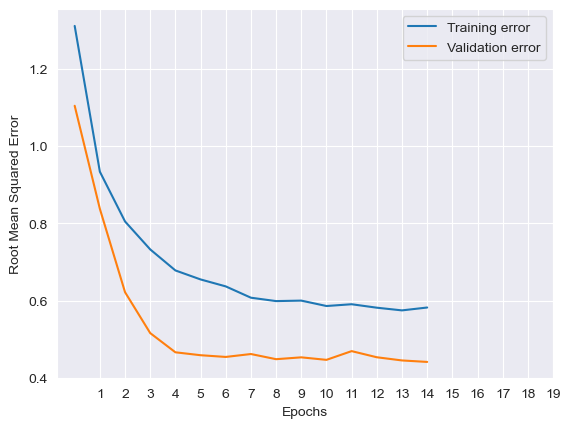

In [117]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(root_metrics_df["rmse"], label = 'Training error')
plt.plot(root_metrics_df["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

# plt.xlim([0, epochs])
plt.xticks(range(1,20))
plt.legend()

plt.show()

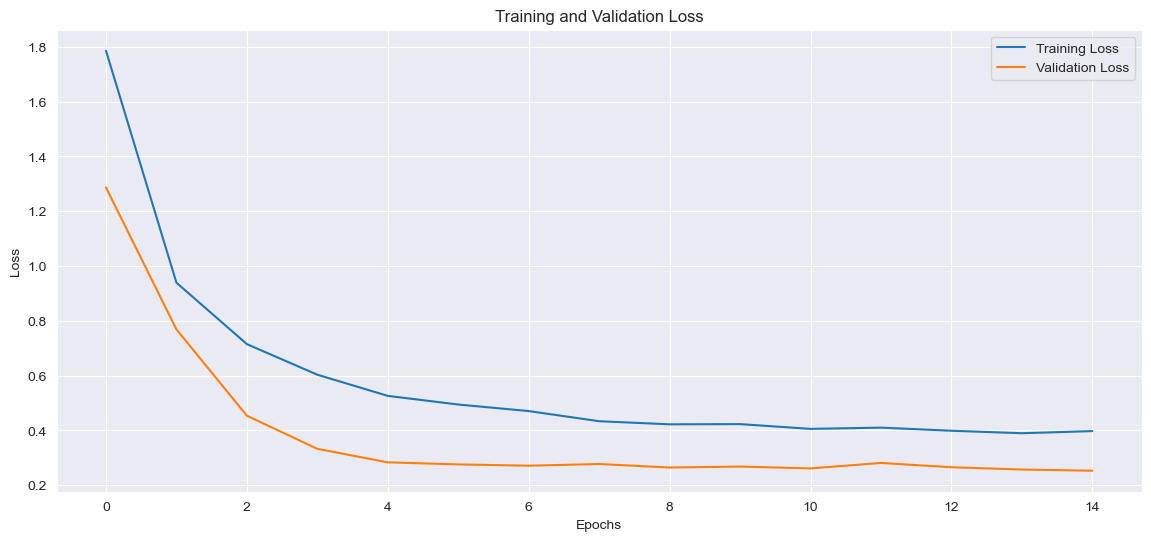

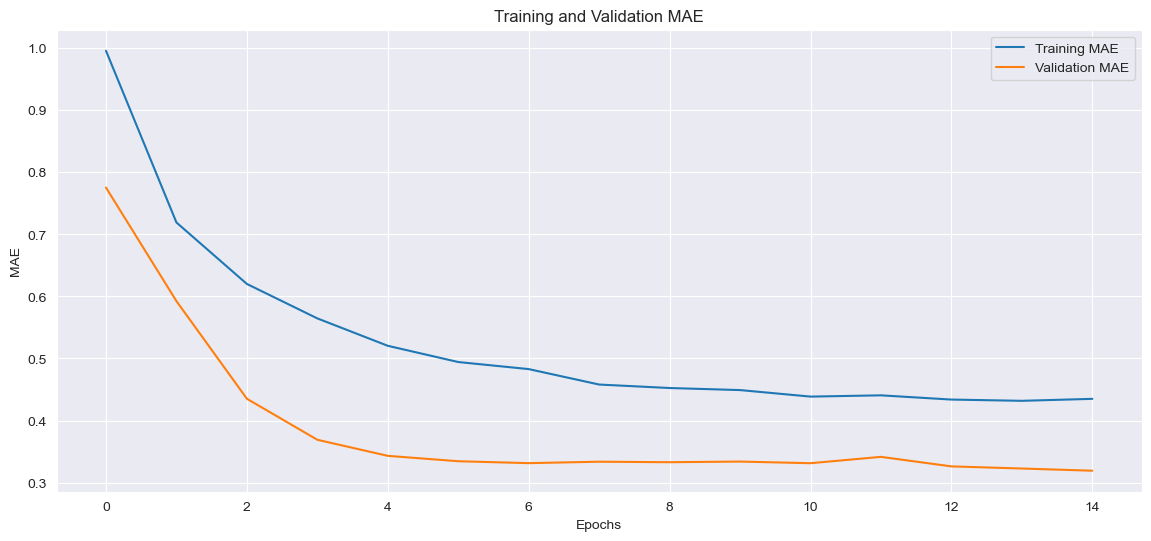

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [118]:
plt.figure(figsize=(14, 6))

# Plot training and validation loss
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

# Plot training and validation MAE (Mean Absolute Error)
plt.figure(figsize=(14, 6))
plt.plot(history_df['mae'], label='Training MAE')
plt.plot(history_df['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation MAE')

plt.show()#Prediction with test data 
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

In [119]:
#Prediction with test data 
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [120]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)


y_test shape: (2156, 1)
y_pred shape: (2156, 1)


In [121]:
# Report performance on test set

from sklearn.metrics import mean_squared_error, mean_absolute_error


print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: ", mean_absolute_error(y_test, y_pred))

RMSE:  0.019474760797874333
MAE:  0.011762894712629911


In [122]:
print(y_pred)

[[ 0.08651742]
 [ 0.07562505]
 [ 0.07548805]
 ...
 [-0.0045201 ]
 [-0.00455816]
 [-0.00461145]]


In [123]:
##Prediction of a time period (check trained model)
## if you want to check the time period, dont test the model on the whole test_data before (could cause bias)

In [100]:
X_test_sorted = X_test.sort_values(by='start_hour')
X_test_sorted.head(500)

,hour_of_day,day_of_week,month_of_year,activeSessions_site1
start_hour,,,,
2021-06-16 13:00:00-07:00,13,2,6,24
2021-06-16 14:00:00-07:00,14,2,6,23
2021-06-16 15:00:00-07:00,15,2,6,23
2021-06-16 16:00:00-07:00,16,2,6,20
2021-06-16 17:00:00-07:00,17,2,6,14
...,...,...,...,...
2021-07-07 04:00:00-07:00,4,2,7,2
2021-07-07 05:00:00-07:00,5,2,7,6
2021-07-07 06:00:00-07:00,6,2,7,11


In [101]:
test_set = model_dataset.loc['2021-05-06':'2021-08-22']
print(test_set.head(20))
X_test_set = test_set.iloc[:, 1:6]
y_test_set = test_set[y_output]
test_set.head(40)

                           utilizationRate_site1  hour_of_day  day_of_week  \
start_hour                                                                   
2021-05-06 00:00:00-07:00               0.000000            0            3   
2021-05-06 01:00:00-07:00               0.000000            1            3   
2021-05-06 02:00:00-07:00               0.000000            2            3   
2021-05-06 03:00:00-07:00               0.000000            3            3   
2021-05-06 04:00:00-07:00               0.000000            4            3   
2021-05-06 05:00:00-07:00               0.012901            5            3   
2021-05-06 06:00:00-07:00               0.038894            6            3   
2021-05-06 07:00:00-07:00               0.104829            7            3   
2021-05-06 08:00:00-07:00               0.195823            8            3   
2021-05-06 09:00:00-07:00               0.315294            9            3   
2021-05-06 10:00:00-07:00               0.344428           10   

,utilizationRate_site1,hour_of_day,day_of_week,month_of_year,activeSessions_site1
start_hour,,,,,
2021-05-06 00:00:00-07:00,0.000000,0,3,5,0
2021-05-06 01:00:00-07:00,0.000000,1,3,5,0
2021-05-06 02:00:00-07:00,0.000000,2,3,5,0
2021-05-06 03:00:00-07:00,0.000000,3,3,5,0
2021-05-06 04:00:00-07:00,0.000000,4,3,5,0
2021-05-06 05:00:00-07:00,0.012901,5,3,5,2
2021-05-06 06:00:00-07:00,0.038894,6,3,5,3
2021-05-06 07:00:00-07:00,0.104829,7,3,5,7
2021-05-06 08:00:00-07:00,0.195823,8,3,5,13


In [102]:
X_test_set_scaled = scaler.transform(X_test_set)
y_pred_scaled = model.predict(X_test_set_scaled)
y_pred_set = scaler_y.inverse_transform(y_pred_scaled)


82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


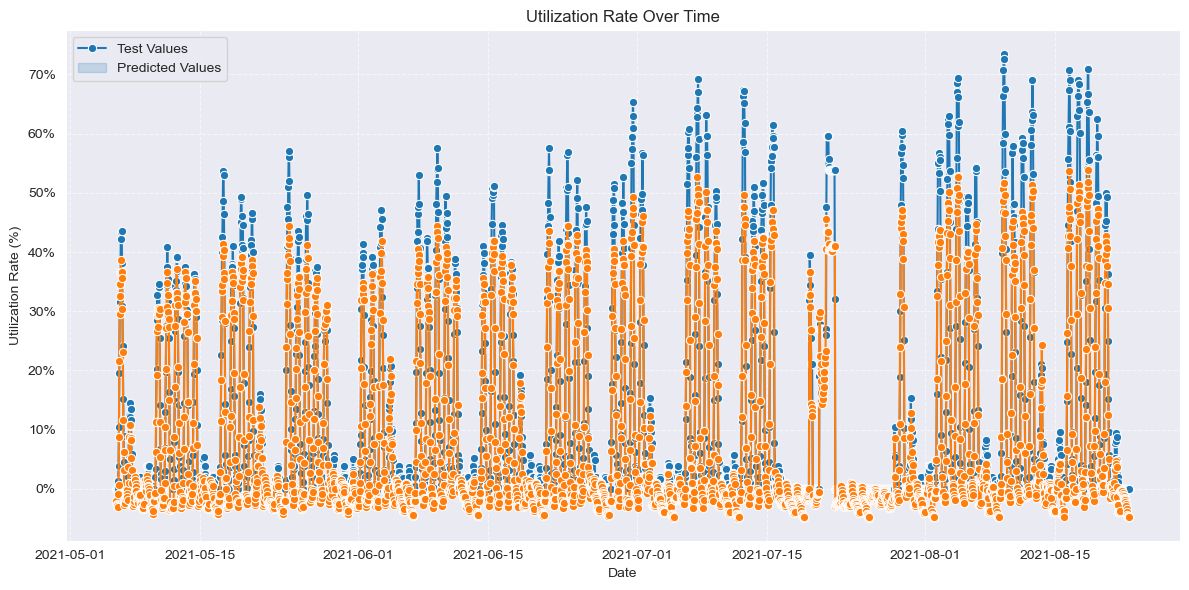

In [103]:
from matplotlib.ticker import PercentFormatter

control_df = pd.DataFrame(X_test_set, columns=['hour_of_day', 'day_of_week', 'month_of_year', 'kWhDelivered', 'activeSessions'])

# Add Y_test and predictions to the DataFrame for filtering
control_df['y_test_utilization_rate'] = y_test_set
control_df['y_pred_utilization_rate'] = y_pred_set

# Filter for Monday (e.g., day_of_week == 1) and January (month_of_year == 1)
filtered_data = control_df[(control_df['day_of_week'] == 4) & (control_df['month_of_year'] == 10)]
# Display the result
plt.figure(figsize=(12, 6))
sns.lineplot(data=control_df, x='start_hour', y='y_test_utilization_rate', marker='o', color='tab:blue')
sns.lineplot(data=control_df, x='start_hour', y='y_pred_utilization_rate', marker='o', color='tab:orange')
plt.title('Utilization Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Utilization Rate (%)')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.legend(["Test Values", "Predicted Values"])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()
plt.show()

In [632]:
# Generate future data for next week using historical patterns
future_dates = pd.date_range(start='2021-07-23', periods=7 * 24, freq='H')
future_features = pd.DataFrame({
    'hour_of_day': future_dates.hour,
    'day_of_week': future_dates.dayofweek + 1,
    'month_of_year': future_dates.month,
    # Use historical averages for kWhDelivered and activeSessions
    'kWhDelivered_site2': X['kWhDelivered_site2'].mean(),  # Replace with daily/hourly trends
    'activeSessions_site2': X['activeSessions_site2'].mean(),  # Replace with daily/hourly trends
})

# Scale future features
future_features_scaled = scaler.transform(future_features)

# Rolling predictions
rolling_predictions = []
input_features = future_features_scaled.copy()
for i in range(len(future_dates)):
    # Predict for the current time step
    pred = model.predict(input_features[i].reshape(1, -1), verbose=0)
    pred_unscaled = scaler_y.inverse_transform(pred)
    rolling_predictions.append(pred_unscaled.flatten()[0])
    
    # Update the input features with the prediction
    if i < len(future_dates) - 1:
        input_features[i + 1, 0] = pred_unscaled.flatten()[0]  # Update utilization rate

# Convert predictions to DataFrame
rolling_predictions_df = pd.DataFrame({
    'date': future_dates,
    'predicted_utilization_rate': rolling_predictions,
})

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(control_df.index, control_df['y_test_utilization_rate'], label='Actual Utilization', color='tab:blue', marker='o')
plt.plot(rolling_predictions_df['date'], rolling_predictions_df['predicted_utilization_rate'], label='Predicted Utilization', color='tab:orange', linestyle='--')
plt.title('Future Utilization Prediction (Rolling)')
plt.xlabel('Date')
plt.ylabel('Utilization Rate (%)')
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()
plt.show()

KeyError: 'kWhDelivered_site2'